In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA


df = pd.read_csv('D:\excelR\PCA\wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [32]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [33]:
df.dropna()
df2=df.drop(['Type'],axis=1)

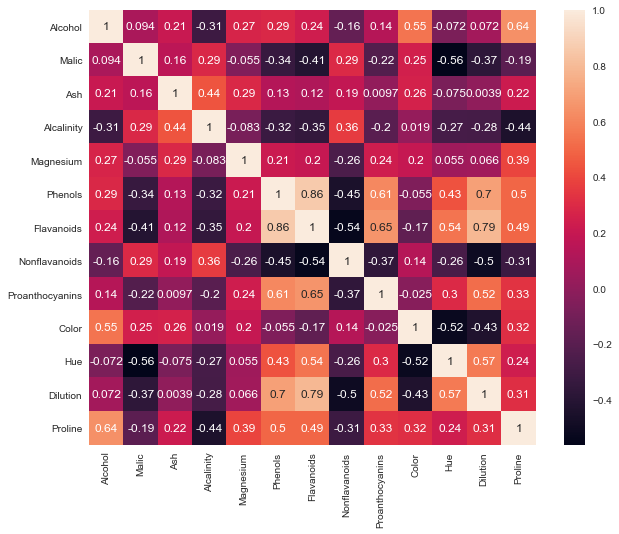

In [34]:
plt.figure(figsize=(10, 8))
correlation = df2.corr()
sns.heatmap(correlation, annot=True)
plt.show()

# Normalizing Data

In [35]:
from sklearn.preprocessing import normalize
df_norm = normalize(df2)
df_norm=pd.DataFrame(df_norm,columns=df2.columns)
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


# PCA

In [36]:
pca= PCA()
pca_values=pca.fit_transform(df_norm)
var = pca.explained_variance_ratio_
var

array([9.77288307e-01, 1.34227214e-02, 4.52003698e-03, 1.61111671e-03,
       1.27350433e-03, 9.18427421e-04, 6.29847297e-04, 1.19411256e-04,
       8.89929288e-05, 6.48043129e-05, 3.15454807e-05, 2.26629171e-05,
       8.62198254e-06])

In [37]:
#cumlative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([97.73, 99.07, 99.52, 99.68, 99.81, 99.9 , 99.96, 99.97, 99.98,
       99.99, 99.99, 99.99, 99.99])

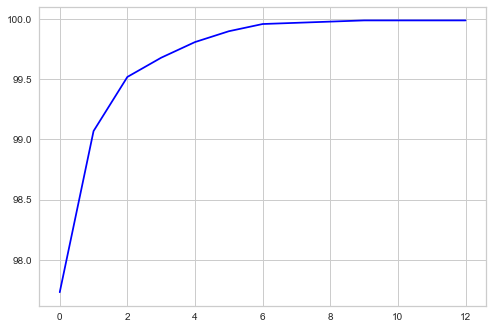

In [38]:
plt.plot(var1,color='blue')

In [39]:
#we will be choosing the first three PCs 
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1', 'pc2','pc3'])],axis=1)
finaldf

,pc1,pc2,pc3
0,-0.037425,0.008566,-0.000703
1,-0.061292,0.006263,-0.001594
2,-0.069781,-0.000652,-0.001750
3,-0.079461,0.001433,-0.001065
4,0.005421,0.005151,-0.000909
...,...,...,...
173,-0.024926,-0.003294,0.004729
174,-0.017195,-0.003465,0.003521
175,-0.011702,0.004963,0.006598
176,-0.012636,0.005245,0.005227


# Hierarchical Clustering

Text(0.5, 1.0, 'Linkage-Complete')

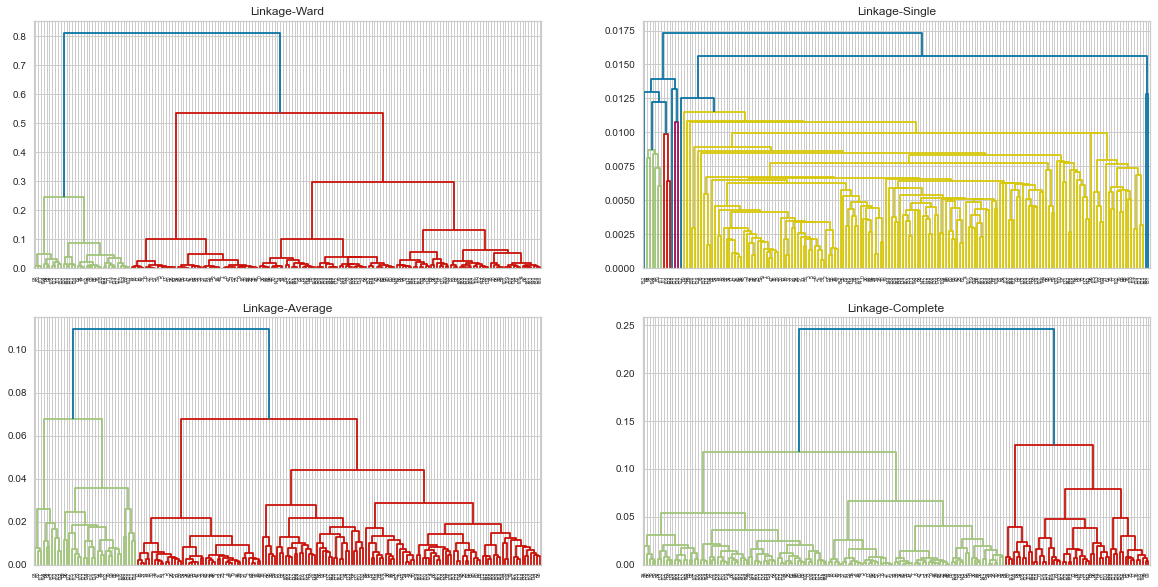

In [40]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
dendograms=sch.dendrogram(sch.linkage(finaldf,'ward'))
plt.title("Linkage-Ward")
plt.subplot(2,2,2)
dendograms=sch.dendrogram(sch.linkage(finaldf,'single'))
plt.title("Linkage-Single")
plt.subplot(2,2,3)
dendograms=sch.dendrogram(sch.linkage(finaldf,'average'))
plt.title("Linkage-Average")
plt.subplot(2,2,4)
dendograms=sch.dendrogram(sch.linkage(finaldf,'complete'))
plt.title("Linkage-Complete")


In [41]:
#silhouette score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for n_clusters in range(2,6):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(finaldf)   
    silhouette_avg = silhouette_score(finaldf, cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5338301091846929
For n_clusters = 3 The average silhouette_score is : 0.5011438130219276
For n_clusters = 4 The average silhouette_score is : 0.47572809557790663
For n_clusters = 5 The average silhouette_score is : 0.4899140094601689


In [42]:
model1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')


#Predict and count numbers in each cluster
clus_solution1 = model1.fit_predict(finaldf)
clus_solution2 = model2.fit_predict(finaldf)
clus_solution3 = model3.fit_predict(finaldf)
clus_solution4 = model4.fit_predict(finaldf)

output1 = pd.DataFrame(data=clus_solution1)
output2 = pd.DataFrame(data=clus_solution2)
output3 = pd.DataFrame(data=clus_solution3)
output4 = pd.DataFrame(data=clus_solution4)

A=output1[0].value_counts(ascending=False)
B=output2[0].value_counts(ascending=False)
C=output3[0].value_counts(ascending=False)
D=output4[0].value_counts(ascending=False)

out=pd.concat([A,B,C,D], axis=1)
out.columns = ['ward', 'single', 'average', 'complete']
print(out)

   ward  single  average  complete
0    99      13       36       127
1    34       2       98        41
2    45     163       44        10


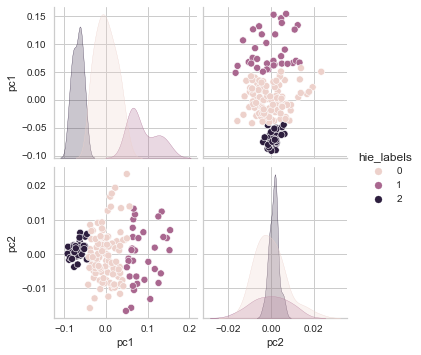

In [43]:
# since from above analysis we can see that model1 with 'ward' as linkage method shows well distributed clustering 
#therefore we will use model1 as our final clustering model 
model1.fit_predict(finaldf)
finaldf['hie_labels']=model1.labels_
g = sns.pairplot(finaldf, vars=['pc1','pc2'], hue="hie_labels", diag_kind="kde")

# Comparing Actual vs Predicted 

In [44]:
data=[df.Type,finaldf.hie_labels]
result = pd.DataFrame({'Actuals':data[0], 'Predicted':data[1]})
result

,Actuals,Predicted
0,1,0
1,1,2
2,1,2
3,1,2
4,1,0
...,...,...
173,3,0
174,3,0
175,3,0
176,3,0


In [45]:
df5=pd.crosstab(result.Actuals,result.Predicted)
df5

Predicted,0,1,2
Actuals,,,
1,14,0,45
2,40,31,0
3,45,3,0


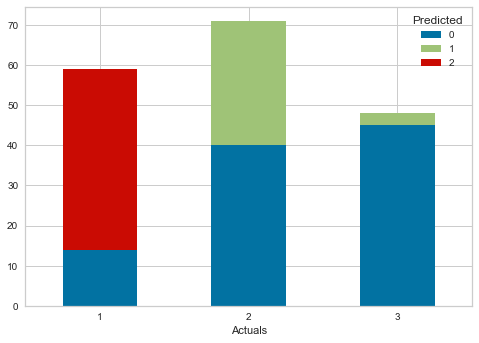

In [46]:
barplot = df5.plot.bar(stacked=True,rot=0)

# K-Means

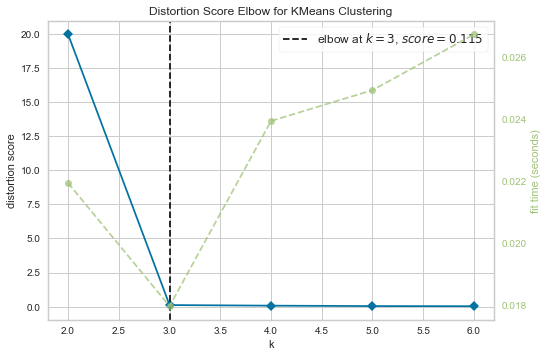

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
#KElbowVisualizer
k=(2,7)
km = KMeans(n_clusters=k)    
visualizer = KElbowVisualizer(km, k=(2,7))
visualizer.fit(finaldf)        # Fit the data to the visualizer
visualizer.show()

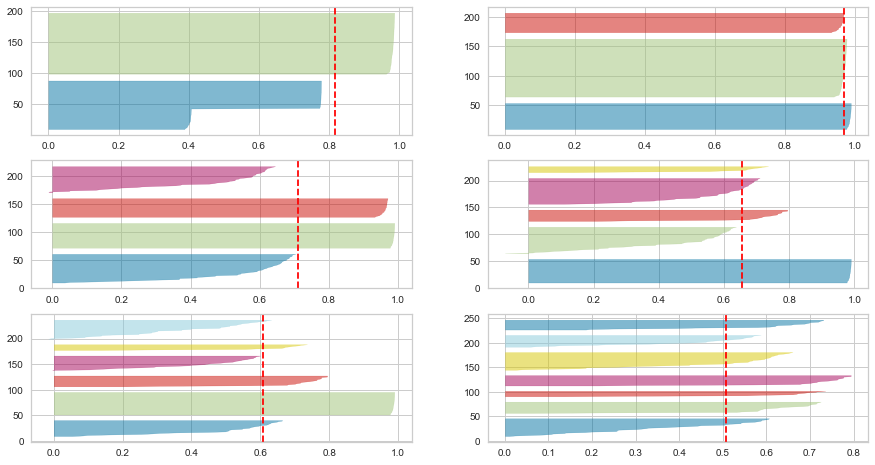

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
   
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
   
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(finaldf) 

In [49]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(finaldf)
model2 = kmeanModel.predict(finaldf)

In [50]:
finaldf['kmeanslabels']=kmeanModel.labels_
finaldf.head()

,pc1,pc2,pc3,hie_labels,kmeanslabels
0,-0.037425,0.008566,-0.000703,0,1
1,-0.061292,0.006263,-0.001594,2,2
2,-0.069781,-0.000652,-0.001750,2,2
3,-0.079461,0.001433,-0.001065,2,2
4,0.005421,0.005151,-0.000909,0,1


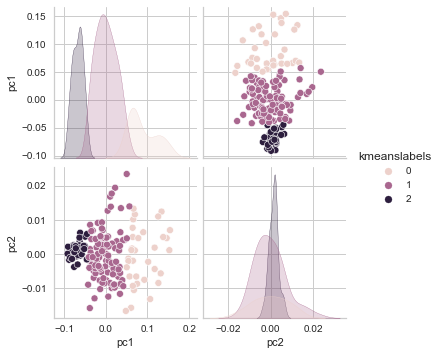

In [51]:
g = sns.pairplot(finaldf, vars=['pc1','pc2'], hue="kmeanslabels", diag_kind="kde")

# Comparing Actual vs Predicted

In [52]:
data2=[df.Type,finaldf.kmeanslabels]
result2 = pd.DataFrame({'Actuals':data[0], 'Predicted':data[1]})
result2

,Actuals,Predicted
0,1,0
1,1,2
2,1,2
3,1,2
4,1,0
...,...,...
173,3,0
174,3,0
175,3,0
176,3,0


In [53]:
df6=pd.crosstab(result2.Actuals,result2.Predicted)
df6

Predicted,0,1,2
Actuals,,,
1,14,0,45
2,40,31,0
3,45,3,0


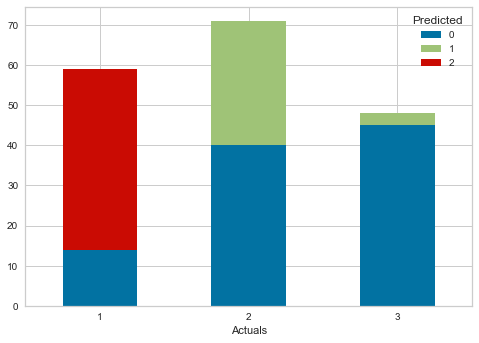

In [54]:
barplot = df5.plot.bar(stacked=True,rot=0)

In [55]:
df7 = result.groupby('Predicted')
df7 = pd.DataFrame(df7['Predicted',].count())
df7

,Predicted
Predicted,
0,99
1,34
2,45
